<a href="https://colab.research.google.com/github/nijinpaul/Assignments/blob/main/Multi_Linea_Regression_Toyota_Corolla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#prepare a prediction model for predicting Price.

In [118]:
pip install ml_metrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [119]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from ml_metrics import mse
print("Required Libraries Imported!")

Required Libraries Imported!


In [120]:
dataset = pd.read_csv('/content/ToyotaCorolla.csv', encoding = "ISO-8859-1")

In [121]:
dataset.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [122]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [123]:
ds=pd.concat([dataset.iloc[:,2:4],dataset.iloc[:,6:7],dataset.iloc[:,8:9],dataset.iloc[:,12:14],dataset.iloc[:,15:18]],axis=1)
ds

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [124]:
ds=ds.rename({'Age_08_04':'Age','cc':'CC','Quarterly_Tax':'QT'},axis=1)
ds

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [125]:
ds[ds.duplicated()]
#Check duplicate row

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [126]:
#Remoce duplicate row
ds=ds.drop_duplicates().reset_index(drop=True)
ds

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [127]:
ds.describe()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,10720.915679,55.980488,68571.782578,101.491986,1576.560976,4.032753,5.026481,87.020209,1072.287108
std,3608.732978,18.563312,37491.094553,14.981408,424.387533,0.952667,0.188575,40.959588,52.251882
min,4350.000000,1.000000,1.000000,69.000000,1300.000000,2.000000,3.000000,19.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.000000,3.000000,5.000000,69.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,1600.000000,4.000000,5.000000,85.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,1600.000000,5.000000,5.000000,85.000000,1085.000000
max,32500.000000,80.000000,243000.000000,192.000000,16000.000000,5.000000,6.000000,283.000000,1615.000000


## Checking the distribution and presence of outliers using histogram and boxplot

###Histogram

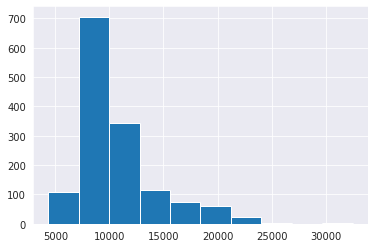

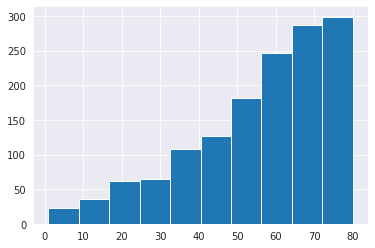

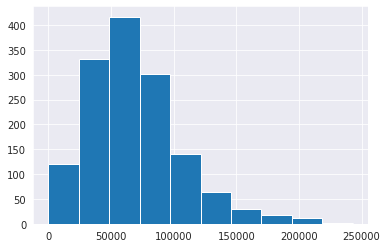

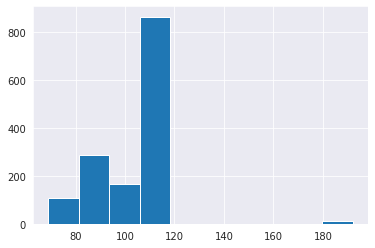

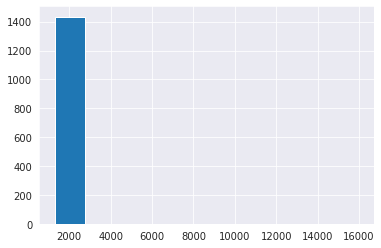

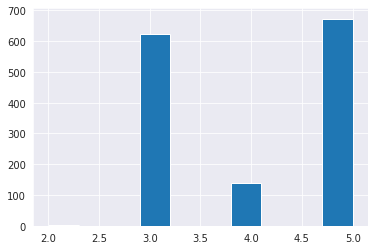

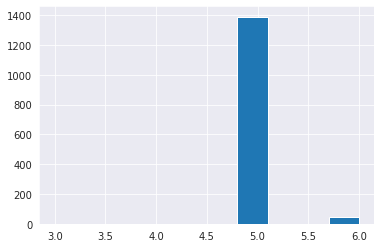

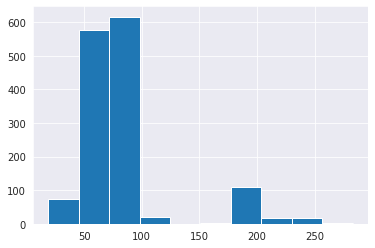

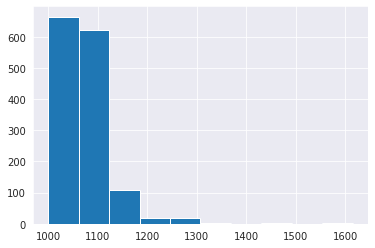

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


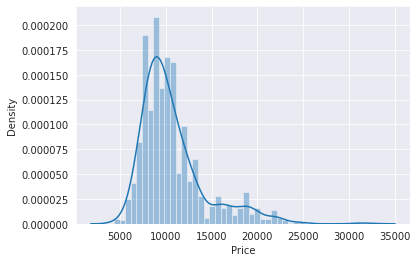

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


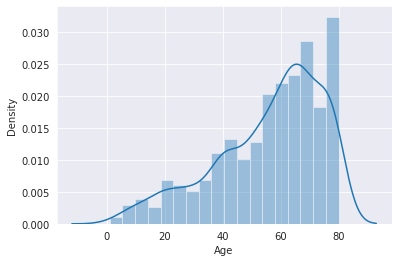

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


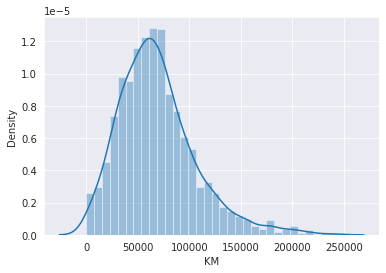

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


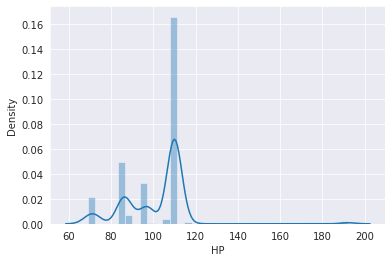

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


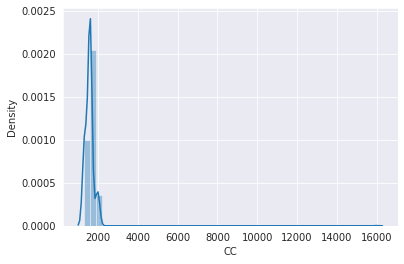

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


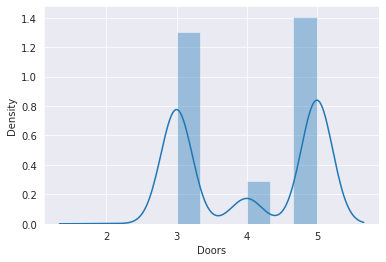

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


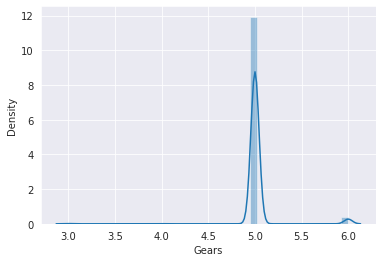

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


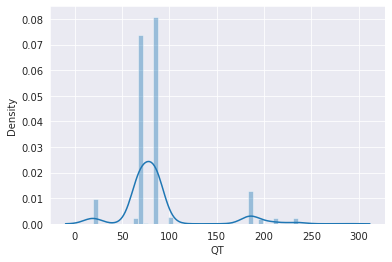

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


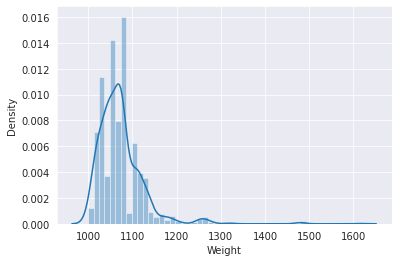

In [128]:
#Visualisation
ds['Price'].hist()
plt.show()
ds['Age'].hist()
plt.show()
ds['KM'].hist()
plt.show()
ds['HP'].hist()
plt.show()
ds['CC'].hist()
plt.show()
ds['Doors'].hist()
plt.show()
ds['Gears'].hist()
plt.show()
ds['QT'].hist()
plt.show()
ds['Weight'].hist()
plt.show()
sns.distplot(ds['Price'])
plt.show()
sns.distplot(ds['Age'])
plt.show()
sns.distplot(ds['KM'])
plt.show()
sns.distplot(ds['HP'])
plt.show()
sns.distplot(ds['CC'])
plt.show()
sns.distplot(ds['Doors'])
plt.show()
sns.distplot(ds['Gears'])
plt.show()
sns.distplot(ds['QT'])
plt.show()
sns.distplot(ds['Weight'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


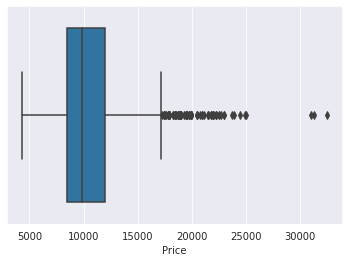

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


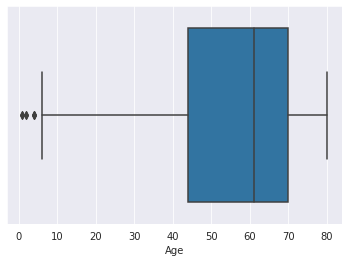

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


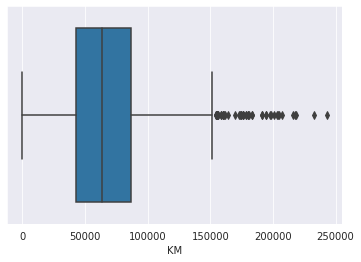

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


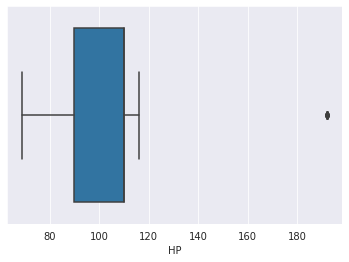

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


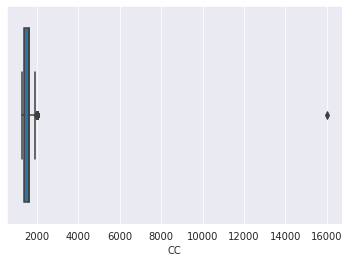

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


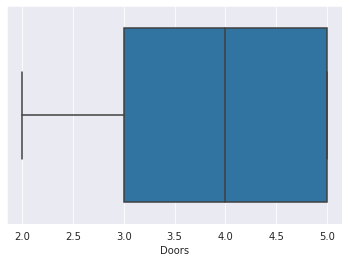

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


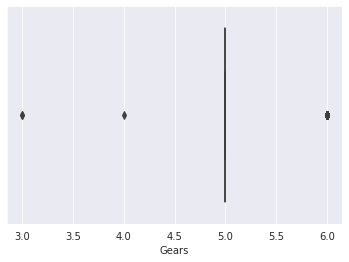

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


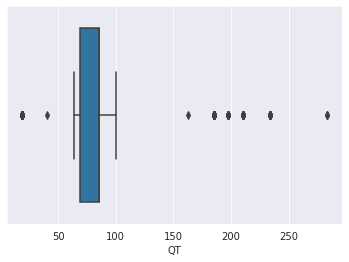

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


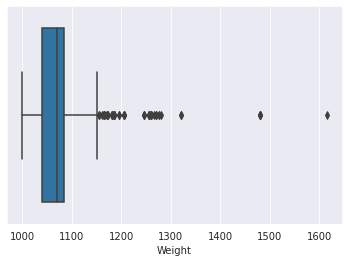

In [129]:
sns.boxplot(ds['Price'])
plt.show()
sns.boxplot(ds['Age'])
plt.show()
sns.boxplot(ds['KM'])
plt.show()
sns.boxplot(ds['HP'])
plt.show()
sns.boxplot(ds['CC'])
plt.show()
sns.boxplot(ds['Doors'])
plt.show()
sns.boxplot(ds['Gears'])
plt.show()
sns.boxplot(ds['QT'])
plt.show()
sns.boxplot(ds['Weight'])
plt.show()

Outliers observed

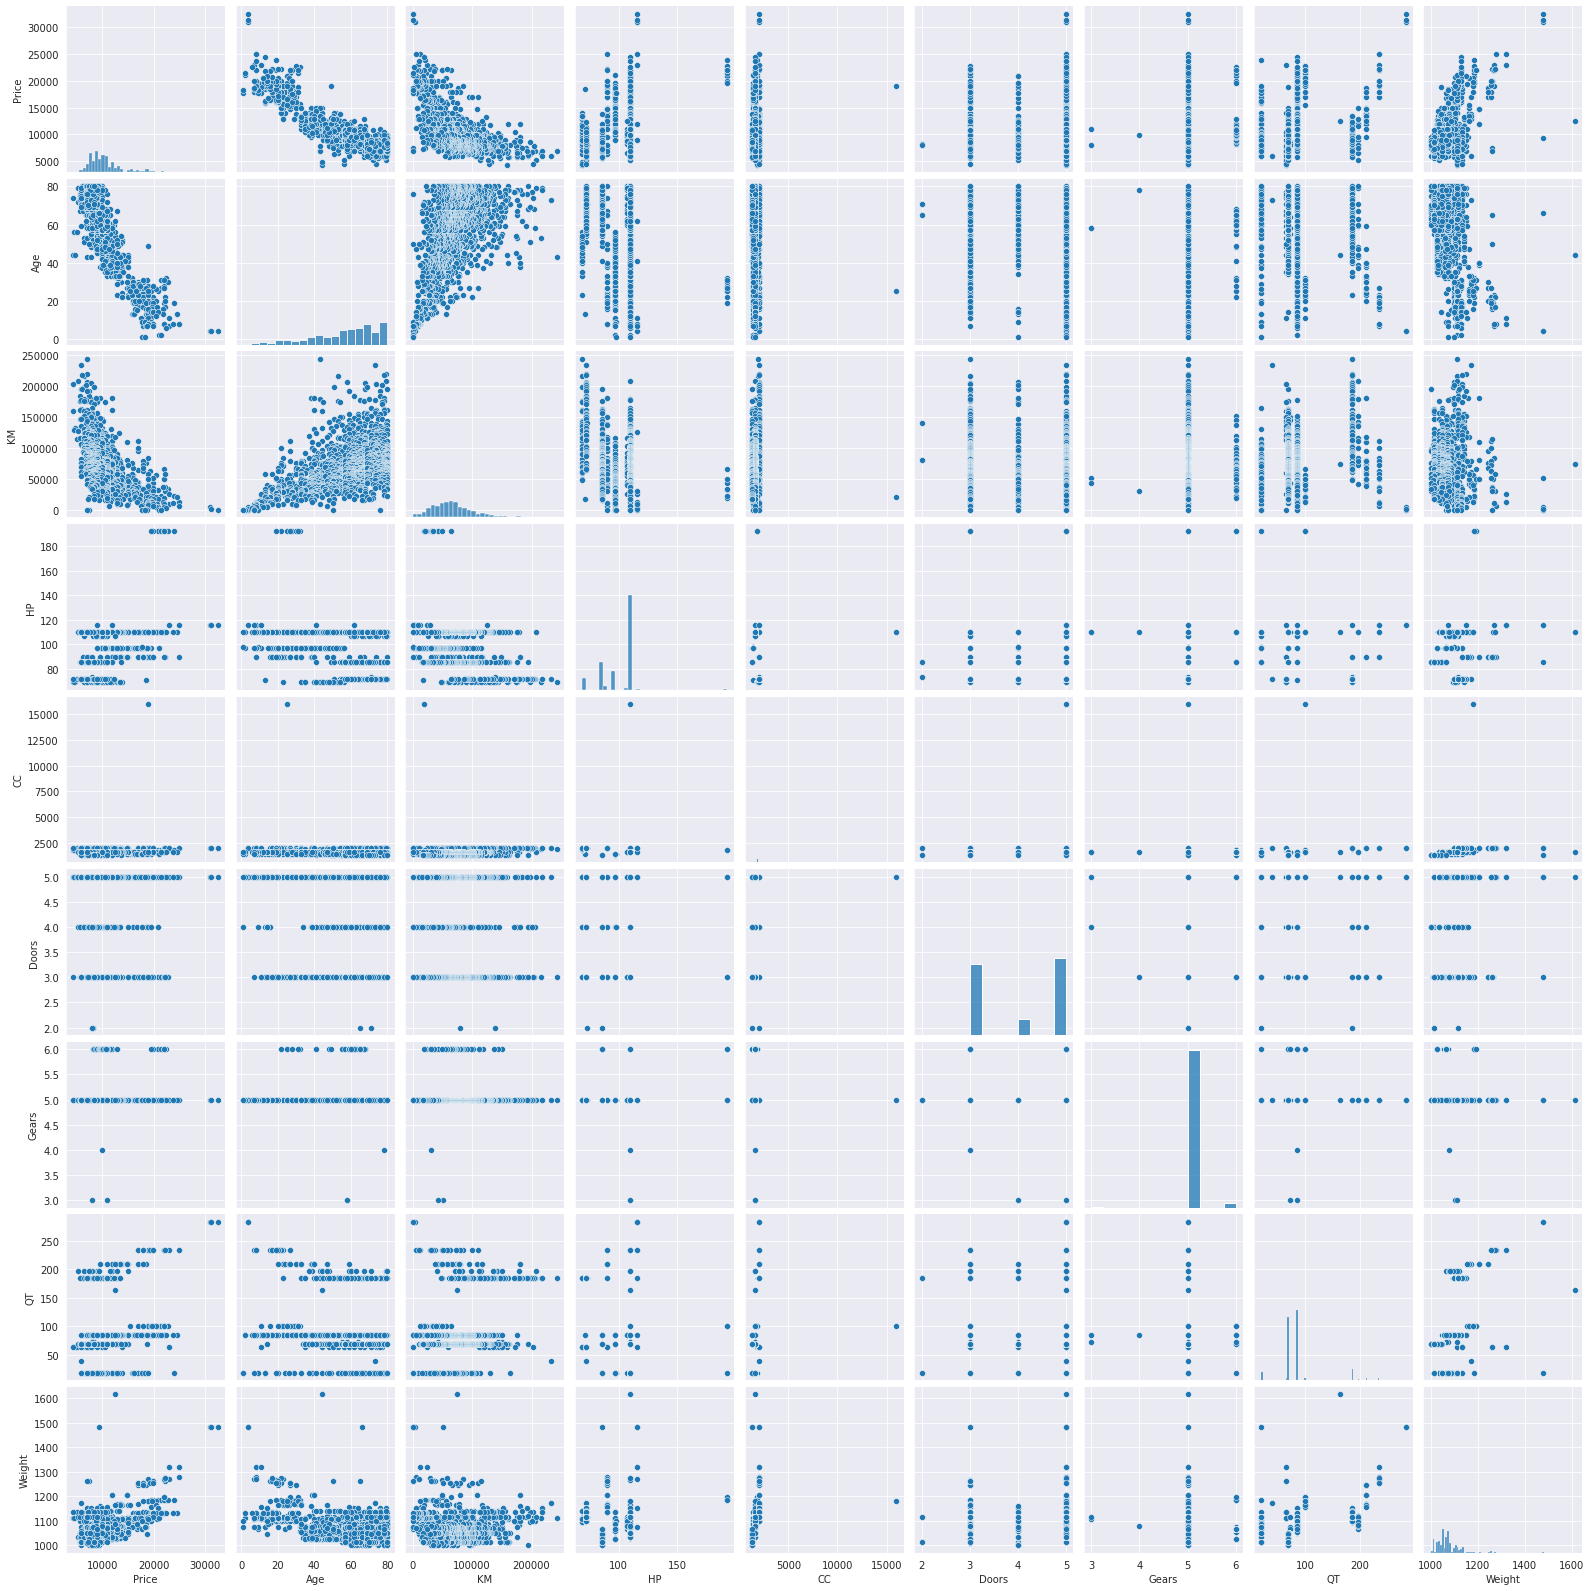

In [130]:
sns.set_style(style='darkgrid')
sns.pairplot(ds)

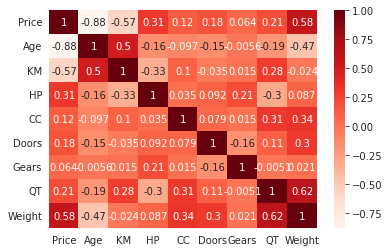

In [131]:
# Checking correlation using correlation matrix and pairplot
ax = sns.heatmap(ds.corr(),annot=True,cmap='Reds') 

Output variable Price is has high correlation with Weight (0.58) and medium correlation with HP(0.31) 

In [132]:
#Standardize the values
array_ds=ds.values
standard_ds=StandardScaler().fit(array_ds).transform(array_ds)
standard_ds[0:5]

array([[ 0.77036821, -1.77726827, -0.57595832, -0.76735061,  0.99811283,
        -1.08444302, -0.14047507,  3.00351318,  1.77496405],
       [ 0.83966875, -1.77726827,  0.11647404, -0.76735061,  0.99811283,
        -1.08444302, -0.14047507,  3.00351318,  1.77496405],
       [ 0.89510918, -1.72337979, -0.71670745, -0.76735061,  0.99811283,
        -1.08444302, -0.14047507,  3.00351318,  1.77496405],
       [ 1.17231135, -1.61560284, -0.54890246, -0.76735061,  0.99811283,
        -1.08444302, -0.14047507,  3.00351318,  1.77496405],
       [ 0.83966875, -1.40004893, -0.80238431, -0.76735061,  0.99811283,
        -1.08444302, -0.14047507,  3.00351318,  1.87068775]])

#Creating Model

In [133]:
model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=ds).fit()

Create Model with independent variables

In [134]:
#Model with independent variable Age
model1 = smf.ols('Price~Age',data=ds).fit()
print('p-value:',model1.pvalues)
print("R-squared value",model1.rsquared)
print("Adjusted R-squared value:",model1.rsquared_adj)

p-value: Intercept    0.0
Age          0.0
dtype: float64
R-squared value 0.7678550373053038
Adjusted R-squared value: 0.7676930380291735


In [135]:
#Model with independent variable KM
model2 = smf.ols('Price~KM',data=ds).fit()
print('p-value:',model2.pvalues)
print("R-squared value",model2.rsquared)
print("Adjusted R-squared value:",model2.rsquared_adj)

p-value: Intercept     0.000000e+00
KM           4.117214e-124
dtype: float64
R-squared value 0.32423867438267795
Adjusted R-squared value: 0.32376710332502456


In [136]:
#Model with independent variable HP
model3 = smf.ols('Price~HP',data=ds).fit()
print('p-value:',model3.pvalues)
print("R-squared value",model3.rsquared)
print("Adjusted R-squared value:",model3.rsquared_adj)

p-value: Intercept    1.031004e-06
HP           3.123394e-34
dtype: float64
R-squared value 0.09868025156106086
Adjusted R-squared value: 0.09805127755656762


In [137]:
#Model with independent variable CC
model4 = smf.ols('Price~CC',data=ds).fit()
print('p-value:',model4.pvalues)
print("R-squared value",model4.rsquared)
print("Adjusted R-squared value:",model4.rsquared_adj)

p-value: Intercept    7.236022e-114
CC            2.292856e-06
dtype: float64
R-squared value 0.015469019620240387
Adjusted R-squared value: 0.014781977763729803


In [138]:
#Model with independent variable Doors
model5 = smf.ols('Price~Doors',data=ds).fit()
print('p-value:',model5.pvalues)
print("R-squared value",model5.rsquared)
print("Adjusted R-squared value:",model5.rsquared_adj)

p-value: Intercept    8.976407e-75
Doors        2.404166e-12
dtype: float64
R-squared value 0.033710397123388525
Adjusted R-squared value: 0.03303608476967146


In [139]:
#Model with independent variable Gears
model6 = smf.ols('Price~Gears',data=ds).fit()
print('p-value:',model6.pvalues)
print("R-squared value",model6.rsquared)
print("Adjusted R-squared value:",model6.rsquared_adj)

p-value: Intercept    0.071254
Gears        0.015590
dtype: float64
R-squared value 0.004074404058589054
Adjusted R-squared value: 0.003379410621086376


In [140]:
#Model with independent variable QT
model7 = smf.ols('Price~Age',data=ds).fit()
print('p-value:',model7.pvalues)
print("R-squared value",model7.rsquared)
print("Adjusted R-squared value:",model7.rsquared_adj)

p-value: Intercept    0.0
Age          0.0
dtype: float64
R-squared value 0.7678550373053038
Adjusted R-squared value: 0.7676930380291735


In [141]:
#Model with independent variable Weight
model8 = smf.ols('Price~Weight',data=ds).fit()
print('p-value:',model8.pvalues)
print("R-squared value",model8.rsquared)
print("Adjusted R-squared value:",model8.rsquared_adj)

p-value: Intercept     2.951487e-78
Weight       1.547077e-127
dtype: float64
R-squared value 0.33162557708698137
Adjusted R-squared value: 0.33115916088118025


#Checking COllinearilty by VIF score

In [142]:
rsq_age = smf.ols('Age~KM+HP+CC+Doors+Gears+QT+Weight',data=ds).fit().rsquared  
vif_age = 1/(1-rsq_age) 

rsq_km = smf.ols('KM~Age+HP+CC+Doors+Gears+QT+Weight',data=ds).fit().rsquared  
vif_km = 1/(1-rsq_km)

rsq_hp = smf.ols('HP~KM+Age+CC+Doors+Gears+QT+Weight',data=ds).fit().rsquared  
vif_hp = 1/(1-rsq_hp)

rsq_cc = smf.ols('CC~KM+HP+Age+Doors+Gears+QT+Weight',data=ds).fit().rsquared  
vif_cc = 1/(1-rsq_cc)

rsq_doors = smf.ols('Doors~KM+HP+CC+Age+Gears+QT+Weight',data=ds).fit().rsquared  
vif_doors = 1/(1-rsq_doors)

rsq_gears = smf.ols('Gears~KM+HP+CC+Doors+Age+QT+Weight',data=ds).fit().rsquared  
vif_gears = 1/(1-rsq_gears)

rsq_qt = smf.ols('QT~KM+HP+CC+Doors+Gears+Age+Weight',data=ds).fit().rsquared  
vif_qt = 1/(1-rsq_qt)

rsq_weight = smf.ols('Weight~KM+HP+CC+Doors+Gears+QT+Age',data=ds).fit().rsquared  
vif_weight = 1/(1-rsq_weight)

d1 = {'Variables':['Age','KM','HP','CC','Doors','Gears','QT','Weight'],'VIF':[vif_age,vif_km,vif_hp,vif_cc,vif_doors,vif_gears,vif_qt,vif_weight]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,Age,1.876236
1,KM,1.757178
2,HP,1.419180
3,CC,1.163470
4,Doors,1.155890
5,Gears,1.098843
6,QT,2.295375
7,Weight,2.487180


In [143]:
pred1=model1.predict()
rmse1=np.sqrt(mse(ds.Price,pred1))
print("RMSE for model 1 is:",rmse1)
pred2=model2.predict()
rmse2=np.sqrt(mse(ds.Price,pred2))
print("RMSE for model 2 is:",rmse2)
pred3=model3.predict()
rmse3=np.sqrt(mse(ds.Price,pred3))
print("RMSE for model 3 is:",rmse3)
pred4=model4.predict()
rmse4=np.sqrt(mse(ds.Price,pred4))
print("RMSE for model 4 is:",rmse4)
pred5=model5.predict()
rmse5=np.sqrt(mse(ds.Price,pred5))
print("RMSE for model 5 is:",rmse5)
pred6=model6.predict()
rmse6=np.sqrt(mse(ds.Price,pred6))
print("RMSE for model 6 is:",rmse6)
pred7=model7.predict()
rmse7=np.sqrt(mse(ds.Price,pred7))
print("RMSE for model 7 is:",rmse7)
pred8=model8.predict()
rmse8=np.sqrt(mse(ds.Price,pred7))
print("RMSE for model 8 is:",rmse8)

RMSE for model 1 is: 1738.1330023703342
RMSE for model 2 is: 2965.514419476729
RMSE for model 3 is: 3424.8599499177453
RMSE for model 4 is: 3579.464560109986
RMSE for model 5 is: 3546.149385879711
RMSE for model 6 is: 3600.1187035031385
RMSE for model 7 is: 1738.1330023703342
RMSE for model 8 is: 1738.1330023703342


In [144]:
d={'Models':['Age','KM','HP','CC','Doors','Gears','QT','Weight'],
   'R-squared values':[model1.rsquared,model2.rsquared,model3.rsquared,model4.rsquared,model5.rsquared,model6.rsquared,model7.rsquared,model8.rsquared],
   'RMSE':[rmse1,rmse2,rmse3,rmse4,rmse5,rmse6,rmse7,rmse8]}
ds_result=pd.DataFrame(d)
ds_result

,Models,R-squared values,RMSE
0,Age,0.767855,1738.133002
1,KM,0.324239,2965.514419
2,HP,0.098680,3424.859950
3,CC,0.015469,3579.464560
4,Doors,0.033710,3546.149386
5,Gears,0.004074,3600.118704
6,QT,0.767855,1738.133002
7,Weight,0.331626,1738.133002


High R squared value  and Lower RMSE value is for QT 

In [145]:
#Constructing P value for each models
p={'Models':['Age','KM','HP','CC','Doors','Gears','QT','Weight'],
   'P values':[model1.pvalues[1].round(4),model2.pvalues[1].round(4),model3.pvalues[1].round(4),model4.pvalues[1].round(4),model5.pvalues[1].round(4),model6.pvalues[1].round(4),model7.pvalues[1].round(4),model8.pvalues[1].round(4)]}
ds1=pd.DataFrame(p)
ds1

,Models,P values
0,Age,0.0000
1,KM,0.0000
2,HP,0.0000
3,CC,0.0000
4,Doors,0.0000
5,Gears,0.0156
6,QT,0.0000
7,Weight,0.0000


In [147]:
#Merging both P value and RMSE values
df_model=pd.merge(ds_result,ds1)
df_model

,Models,R-squared values,RMSE,P values
0,Age,0.767855,1738.133002,0.0000
1,KM,0.324239,2965.514419,0.0000
2,HP,0.098680,3424.859950,0.0000
3,CC,0.015469,3579.464560,0.0000
4,Doors,0.033710,3546.149386,0.0000
5,Gears,0.004074,3600.118704,0.0156
6,QT,0.767855,1738.133002,0.0000
7,Weight,0.331626,1738.133002,0.0000


#Model Deletion for outliers

###Detect model using Leverage value

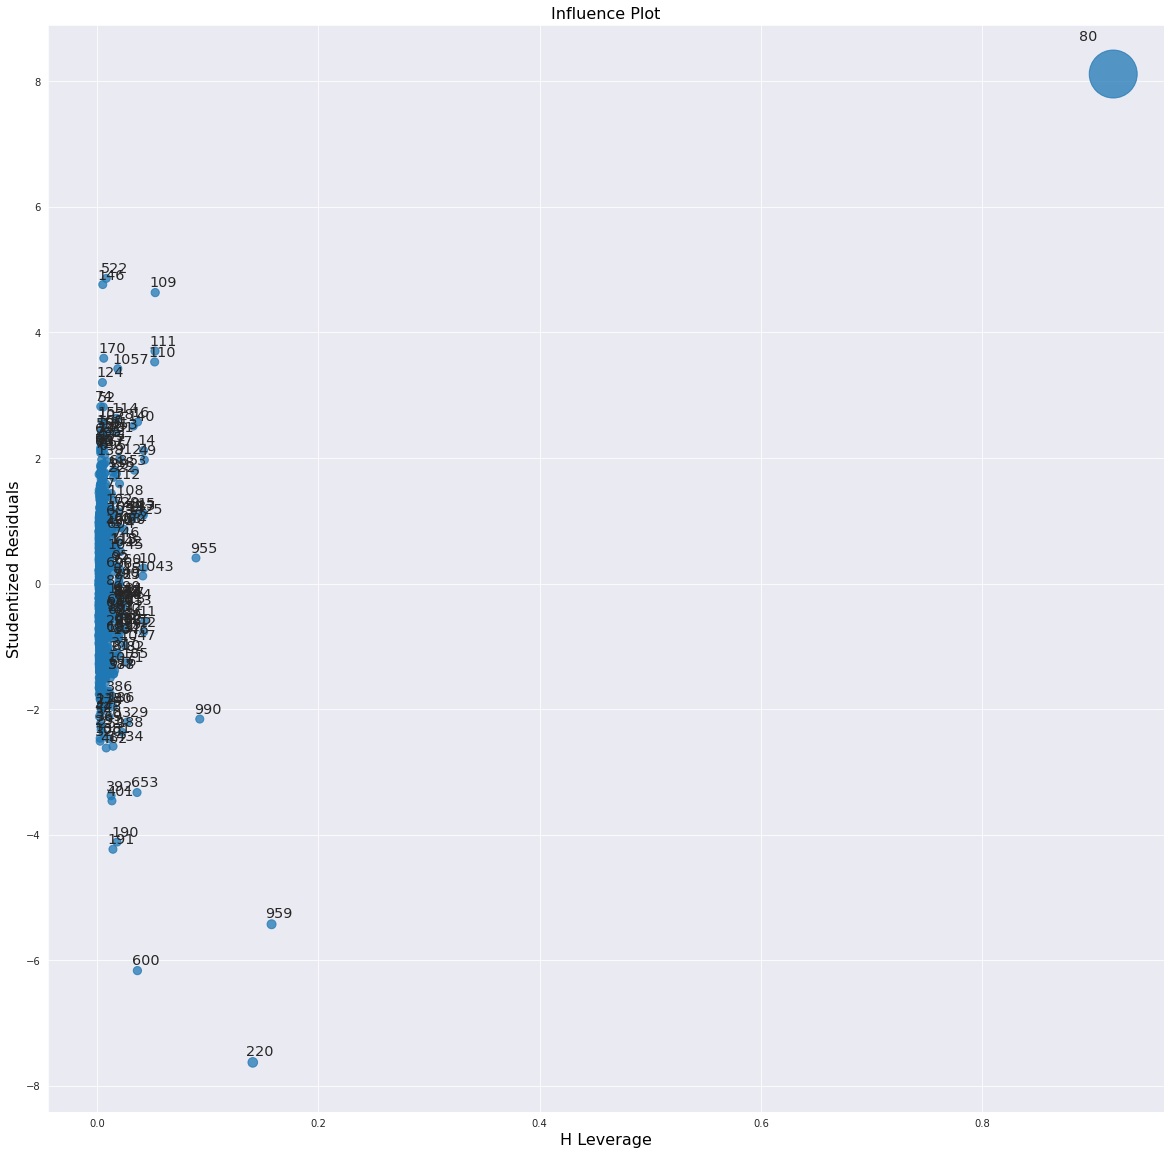

In [148]:
# 2. Leverage Value using High Influence Points : Points beyond Leverage_cutoff value are influencers
fig,ax=plt.subplots(figsize=(20,20))
fig=influence_plot(model,ax = ax)

Row Number 80 is an outlier

In [150]:
#Check row no 80
ds[ds.index.isin([80])] 

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
80,18950,25,20019,110,16000,5,5,100,1180


In [152]:
ds_new = ds.copy()
ds_new

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [153]:
ds_new=ds_new.drop(ds_new.index[[80]],axis=0).reset_index(drop=True)
ds_new

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1429,7500,69,20544,86,1300,3,5,69,1025
1430,10845,72,19000,86,1300,3,5,69,1015
1431,8500,71,17016,86,1300,3,5,69,1015
1432,7250,70,16916,86,1300,3,5,69,1015


###Model Prediction

In [155]:
# say New data for prediction is
new_data=pd.DataFrame({'Age':12,"KM":40000,"HP":80,"CC":1300,"Doors":4,"Gears":5,"QT":69,"Weight":1012},index=[0])
new_data

,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,12,40000,80,1300,4,5,69,1012


In [157]:
final_model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=ds_new).fit()

In [161]:
# Manual Prediction of Price
price=final_model.predict(new_data)
print("Predicted price", price)

Predicted price 0    14970.556739
dtype: float64


In [160]:
pred_y=final_model.predict(ds_new)
pred_y

0       16513.565909
1       16051.656226
2       16486.949796
3       16133.995128
4       15921.372341
            ...     
1429     8970.611964
1430     8435.944671
1431     8591.765915
1432     8714.053275
1433     9966.948423
Length: 1434, dtype: float64